In [51]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = [8, 6]

## Probability and Sampling Distributions

### Bayes' theorem (Bayes' law or Bayes' rule)    
　　In probability theory and statistics, Bayes’s theorem (alternatively Bayes’s law or Bayes’s rule) describes the probability of an event, based on `prior knowledge of conditions that might be related to the event`.    
　　For example, if cancer is related to age, then, using Bayes’ theorem, a person's age can be used to more accurately assess the probability that they have cancer than can be done without knowledge of the person’s age. 
　　With the Bayesian probability interpretation the theorem expresses how a degree of belief, expressed as a probability, should rationally change to account for availability of related evidence. 

$$ P(A\mid B) = \frac {P(B\mid A)P(A)}{P(B)} $$

P(A|B) is a conditional probability: the likelihood of event A occurring given that B is true.    
P(B∣A) is also a conditional probability: the likelihood of event B occurring given that A is true.    
P(A) and P(B) re the probabilities of observing A and B independently of each other; this is known as the `marginal probability`

In [1]:
%%html
# from youtuber Veritasium
<video controls="" preload="none" width="900px" height="600px">
    <source src="The Bayesian Trap.mp4">
</video>

You're testing for a disease and advertising that the test is `99%` accurate; that is if you have the disease, you will test positive `99%` of the time, and if you don't have the disease, you will test negative `99%` of the time.    
Let's say that `1%` of all people have the disease.    
Someone tests positive, what's the probability that the person has the disease?

In [16]:
PT = .99
NF = .99
T = .01

PF = 1 - NF
F = 1 - T
# Bayes' Theorem
TP = (PT*T)/((PT*T) + (PF*F))
print("given positive, prob of actually having the disease is {:.1%}".format(TP%100))

given positive, prob of actually having the disease is 50.0%


You have two coins in your hand. Out of the two coins, one is a real coin (heads and tails) and the other is a faulty coin with tails on both sides.

You are blindfolded and forced to choose a random coin and then toss it in the air. The coin lands with tails facing upwards. Find the probability that this is the faulty coin. (hint: probability tree)
![](tree_diagram.png)

In [9]:
# T - fair coin, F - faulty coin, PF - P(tail|faulty coin)
# FP - P(faulty coin|tail)
T = .5
F = .5
PT = .5

PF = 1  # both sides are tails

FP = (PF*F) / ((PF*F) + (PT*T))
print(FP)

0.6666666666666666


### ***Central Limit Theorem***
>　　With a large enough collection of samples from the same population, the `sample means` will be `normally distributed`.    
　　CLI promises sampling mean distribution will be normal, therefore we can perform a `hypothesis test`. More concretely, we can ***access the likelyhood that a given mean came from a particular distribution*** and then, based on this, reject or fail to reject the null hypothesis(a sample mean came form that population).    
　　This empowers all of the `A/B tests` in practice.

    Note: It doesn't make any assumptions about the underlying distribution of the data;    
    With reasonably large sample of roughly 30 or more, the theorem will alway be ture no matter what the population distribution looks like.

![](cli.png)

In [14]:
%%html
<video controls="" preload="none" width="900px" height="600px">
    <source src="CLI.mp4">
</video>

### Law of large numbers
>　　As the size of sample increased, the estimate of the sample mean will more accurately reflect the population mean.

![](large_num.png)

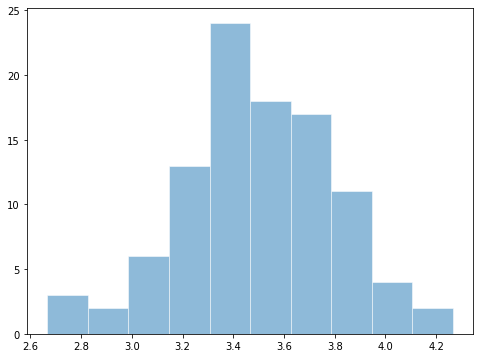

In [171]:
from numpy.random import randint

# a standard die numbered 1 through 6
# 100 samples of size 30
means_100 = [randint(1, 7, 30).mean() for i in range(100)]
# means_1000 = [randint(1, 7, 30).mean() for i in range(1000)]

plt.hist(means_100, ec='white', alpha=0.5)
# plt.hist(means_1000, ec='grey', alpha=0.5)

plt.show()

(array([0.26086957, 0.52173913, 0.7826087 , 0.97826087, 0.84782609,
        1.56521739, 0.84782609, 0.26086957, 0.26086957, 0.19565217]),
 array([2.76666667, 2.92      , 3.07333333, 3.22666667, 3.38      ,
        3.53333333, 3.68666667, 3.84      , 3.99333333, 4.14666667,
        4.3       ]),
 <a list of 10 Patch objects>)

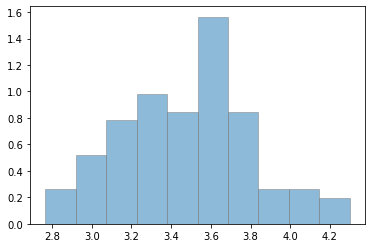

### Probability Distributions
+ Indicates likelihood of an outcome
+ Probabilities must add up to 1

>　　In probability theory and statistics, a probability distribution is ***a mathematical function that provides the probabilities of occurrence of different possible outcomes in an experiment***.    
　　In more technical terms, the probability distribution is ***a description of a random phenomenon in terms of the probabilities of events***. 概率分布是依据所有可能事件的概率来描述随机现象.
>>In probability theory, `an event` is a set of outcomes of an experiment (a subset of the sample space) to which a probability is assigned.

>　　Probability distributions are generally divided into two classes. A `discrete probability distribution` can be encoded by a discrete list of the probabilities of the outcomes, known as a `PMF - probability mass function`. On the other hand, a `continuous probability distribution` is typically described by `PDF - probability density functions` (with the probability of any individual outcome actually being 0).


![](common_distributions.png)

In [56]:
%%html
<video controls="" preload="none" width="900px" height="600px">
    <source src="proba distributions.mp4">
</video>

SyntaxError: invalid syntax (<ipython-input-56-46a513f7f48c>, line 2)

#### Binomial distribution
>　　In probability theory and statistics, the binomial distribution with parameters `n` and `p` is the `discrete probability distribution` of ***the number of successes in a sequence of n independent experiments***, each asking a yes–no question, and each with its own boolean-valued outcome: success (with probability p) or failure (with probability q = 1 − p).    
　　A single success/failure experiment is also called a `Bernoulli trial` or `Bernoulli experiment` and a sequence of outcomes is called a `Bernoulli process`; 

##### Bernoulli distribution

Let's stick to the prior example of `flipping a fair coin and checking the outcome`: heads or tails.

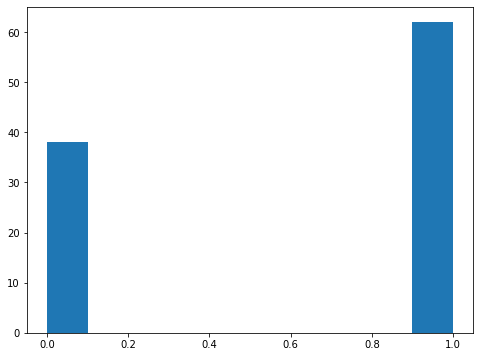

In [172]:
''' rvs - Random Variates of given `Size` '''
from scipy.stats import bernoulli
data = bernoulli.rvs(p=0.5, size=100)

# Plot distribution
plt.hist(data)
plt.show()

##### Binomial distribution

As we touched on in the slides, the binomial distribution is used to `model the number of successful outcomes in trials` where there is some consistent probability of success.

For this exercise, consider a game where you are trying to make a ball in a basket. You are given 10 shots and you know that you have an 80% chance of making a given shot. To simplify things, assume each shot is an independent event.    

    The binomial distribution is frequently used to model the number of successes in a sample of size n drawn with replacement from a population of size N.
                                           -- wikipedia

In [5]:

from scipy.stats import binom
data = binom.rvs(
    n=10,  # number of trials(experiments) / sample size
    p=0.8,   # probability of success
    size=1000  # population / the number of samples
)

# Plot the distribution
plt.hist(data, ec='white')
plt.show()


# Assign and print probability of 8 or less successes
''' cdf - cumulative distribution function 累积分布函数'''
prob1 = binom.cdf(k=8, n=10, p=0.8)
print(prob1)

# Assign and print probability of all 10 successes
''' pmf - probability mass function 概率质量函数 '''
prob2 = binom.pmf(k=10, n=10, p=0.8)
print(prob2)

NameError: name 'plt' is not defined

#### Normal distribution  `scipy.stats.norm.rvs(), scipy.stats.norm.cdf()`
>　　Normal distribution is a bell-curve shaped `continuous probability distribution`.    
　　In probability theory, a normal (or Gaussian) distribution is a type of continuous probability distribution for a real-valued random variable.

![](normal_distribution.png)

How the `normal distribution` along with the `central limit theorem` enables us to perform hypothesis tests?

Similar to the previous exercises, here you'll start by simulating some data and examining the distribution, then dive a little deeper and examine the probability of certain observations taking place.

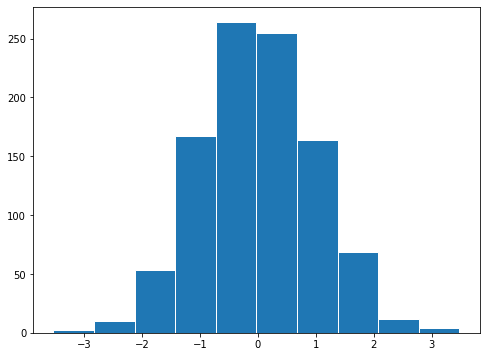

0.02275013194817921
0.02


In [174]:
from scipy.stats import norm
# standard normal distribution(μ=0, σ=1) 
data = norm.rvs(size=1000)  

plt.hist(data, ec='white')
plt.show()


# 结果可参考上面标准正太分布图
# Compute and print true probability for greater than 2(σ)
true_prob = 1 - norm.cdf(2)
print(true_prob)

# Compute and print sample probability for greater than 2(σ)
sample_prob = sum(obs > 2 for obs in data) / len(data)
print(sample_prob)

#### Poisson distribution
>　　Poisson distribution is a `discrete probability distribution` that expresses ***the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate 平均速率 and independently of the time since the last event***.
>>　　For instance, an individual keeping track of the amount of mail they receive each day may notice that they receive an average number of 4 letters per day. ***`If receiving any particular piece of mail does not affect the arrival times of future pieces of mail, i.e., if pieces of mail from a wide range of sources arrive independently of one another, then a reasonable assumption is that the number of pieces of mail received in a day obeys a Poisson distribution`***. Other examples that may follow a Poisson distribution include the number of phone calls received by a call center per hour and the number of decay events per second from a radioactive source.

![](Poisson_pmf.svg)

## Exploratory Data Analysis

### descriptive statistics  `np.array.mean(), np.array.median(), np.array.std()`
Measures of centrality
+ Mean
+ Median
+ Mode
![](centrality.png)

Measures of variability
+ Variance
+ Standard deviation
+ Range    

$$ s = \sqrt{ \frac{\sum _{i=1}^{N}(x_{i}- \bar {x})^2}{N-1}} \; standard\;deviation\;for\;sample $$

Modality
![](modality.png)

Skewness
![](skewness.png)

In [86]:
%%html
<video controls="" preload="none" width="900px" height="600px">
    <source src="descriptive stats.mp4">
</video>

standard deviation

In [212]:
# Create a sample list
import math
nums = [1, 2, 3, 4, 5]

# Compute the mean of the list
mean = np.array(nums).mean()

# Compute the variance and print the std of the list
variance = sum(pow(x - mean, 2) for x in nums) / len(nums)
std = math.sqrt(variance)
print(std)

# Compute and print the actual result from numpy
real_std = np.array(nums).std()
print(real_std)

1.4142135623730951
1.4142135623730951


### Categorical data  
+ ordinal
+ nominal

#### Encoding categorical data  `sklearn.preprocessing.LabelEncoder()`, `sklearn.preprocessing.LabelEncoder().transform()`, `pd.get_dummies()`
+ label encoding

food name|categorical #|calories
-|-|-
apple|1|95
chicken|2|231
broccoli|3|50

+ one hot encoding

apple|chicken|broccoli|calories
-|-|-|-
1|0|0|95
0|1|0|231
0|0|1|50

    




In [12]:
''' label encoding '''
import pandas as pd
laptops = pd.read_csv('laptops.csv', encoding='utf-8')

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
new_value = encoder.fit_transform(laptops['Company'])

print(new_value)

[ 1  1  7 ... 10  7  2]


In [13]:
''' One-hot encoding '''
laptops2 = pd.get_dummies(data=laptops, columns=['Company'])
print(laptops2.head())

   Unnamed: 0      Product   TypeName  Inches  \
0           1  MacBook Pro  Ultrabook    13.3   
1           2  Macbook Air  Ultrabook    13.3   
2           3       250 G6   Notebook    15.6   
3           4  MacBook Pro  Ultrabook    15.4   
4           5  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  ... Company_LG  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  ...          0   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  ...          0   
2            256G

#### countplot and boxplot  `df.info()`, `seaborn.countplot()`, `df.boxplot()`, `df['col'].isin()`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
Unnamed: 0          1303 non-null int64
Company             1303 non-null object
Product             1303 non-null object
TypeName            1303 non-null object
Inches              1303 non-null float64
ScreenResolution    1303 non-null object
Cpu                 1303 non-null object
Ram                 1303 non-null object
Memory              1303 non-null object
Gpu                 1303 non-null object
OpSys               1303 non-null object
Weight              1303 non-null object
Price_euros         1303 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


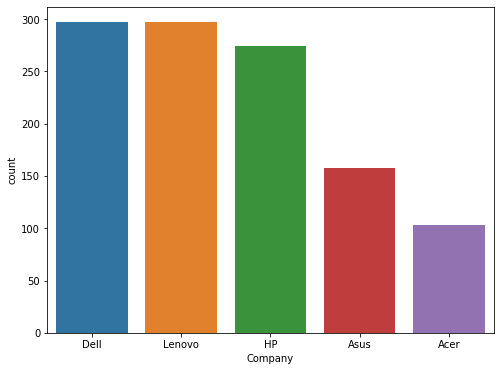

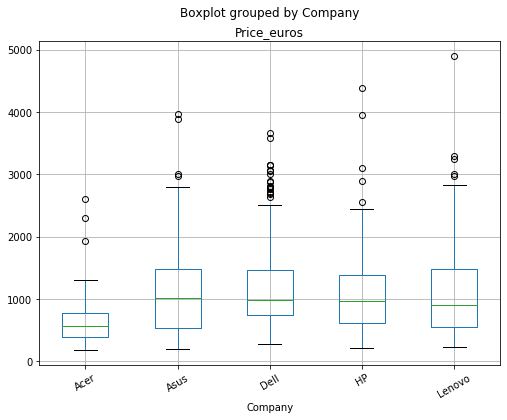

In [178]:
import seaborn as sns
laptops.info()

top5 = laptops['Company'].value_counts(ascending=False)[:5].index
t5_laptop = laptops[laptops['Company'].isin(top5)]

''' countplot '''
sns.countplot(t5_laptop['Company'], order=top5)
plt.show()

''' boxplot '''
t5_laptop.boxplot('Price_euros', 'Company', rot=30)
plt.show()

### two or more variables  `plt.scatter()`, `sns.pairplot(df[['col1', 'col2', ..., 'coln']])`, `df['col'].corr(df['col'])`

***Covariance:***
$$ cov(x, y) = \frac {\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{(n-1)} $$
***Pearson's correlation***
$$ r = \frac {cov(x, y)}{S_xS_y} $$




![](pearson_correlation.png)

In [155]:
%%html
<video controls="" preload="none" width="900px" height="600px">
    <source src="Two or more variables.mp4">
</video>

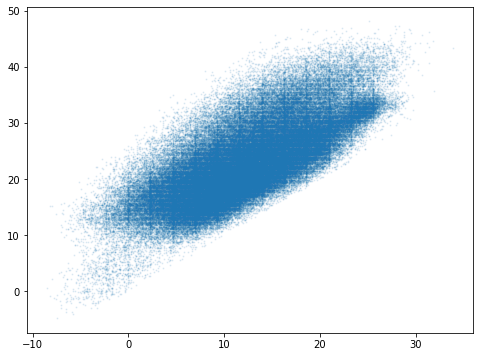

In [186]:
weather = pd.read_csv('weather.csv')

plt.scatter('MinTemp', 'MaxTemp', data=weather,
            s=1, alpha=0.1)
plt.show()

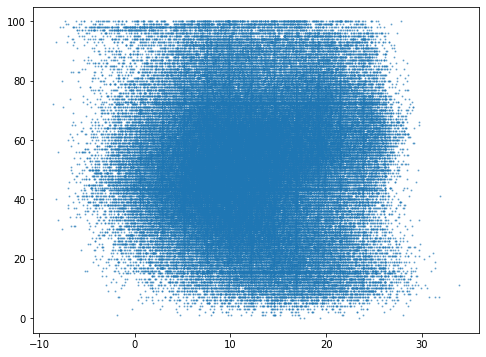

In [188]:
plt.scatter(weather['MinTemp'], weather['Humidity3pm'],
            s=1, alpha=0.5)
plt.show()

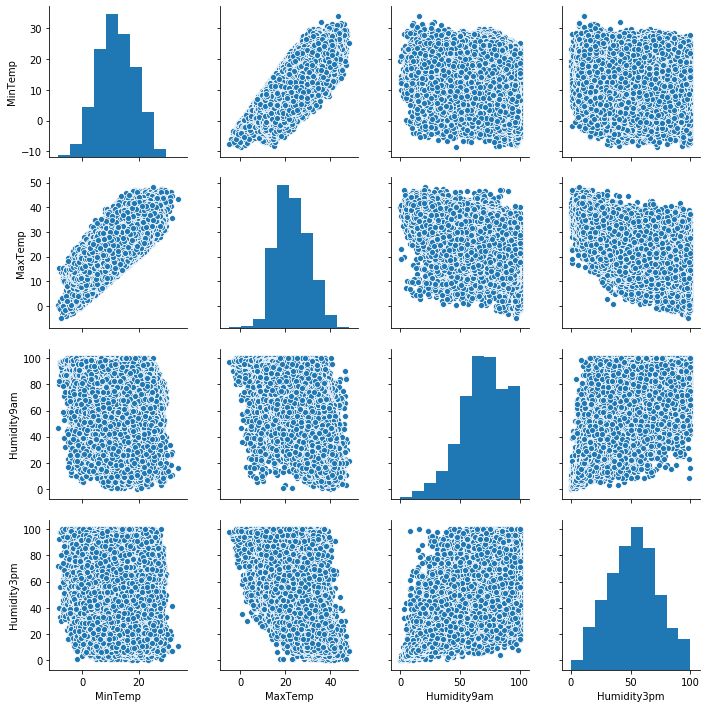

In [191]:
sns.pairplot(weather[['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm']])

In [192]:
# Compute and print the Pearson correlation
r = weather['Humidity9am'].corr(weather['Humidity3pm'])

# Calculate the r-squared value and print the result
r2 = r**2
print(r2)

0.44540652849522555


Anscombe's quartet

![](Anscombe's_quartet.svg)


I| I| 	II| II| III| III| IV|IV
-|-|-|-|-|-|-|-
x| 	y| 	x| 	y| 	x| 	y| 	x| 	y
|10.0 	|8.04 	|10.0 	|9.14 	|10.0 	|7.46 	|8.0 	|6.58
|8.0 	|6.95 	|8.0 	|8.14 	|8.0 	|6.77 	|8.0 	|5.76
|13.0 	|7.58 	|13.0 	|8.74 	|13.0 	|12.74 	|8.0 	|7.71
|9.0 	|8.81 	|9.0 	|8.77 	|9.0 	|7.11 	|8.0 	|8.84
|11.0 	|8.33 	|11.0 	|9.26 	|11.0 	|7.81 	|8.0 	|8.47
|14.0 	|9.96 	|14.0 	|8.10 	|14.0 	|8.84 	|8.0 	|7.04
|6.0 	|7.24 	|6.0 	|6.13 	|6.0 	|6.08 	|8.0 	|5.25
|4.0 	|4.26 	|4.0 	|3.10 	|4.0 	|5.39 	|19.0 	|12.50
|12.0 	|10.84 	|12.0 	|9.13 	|12.0 	|8.15 	|8.0 	|5.56
|7.0 	|4.82 	|7.0 	|7.26 	|7.0 	|6.42 	|8.0 	|7.91
|5.0 	|5.68 	|5.0 	|4.74 	|5.0 	|5.73 	|8.0 	|6.89 

## Statistical Experiments and Significance Testing

### confidence interval  `scipy.stats.t.interval()`, `statsmodels.stats.proportion.proportion_confint()`
>　　In statistics, a `confidence interval (CI)` is a type of estimate computed from the statistics 统计量 of the observed data. This proposes a range of plausible values for an unknown parameter. The interval has an associated `confidence level` that the true parameter is in the proposed range.    


Means:
$$ \bar{X} \pm Z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}} $$

Proportions:
$$ \hat{p} \pm Z_{\frac{\alpha}{2}}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} $$

The `standard error` (`SE`) of a statistic 统计量 (usually an estimate of a parameter) is the standard deviation of its sampling distribution or an estimate of that standard deviation.

In [198]:
%%html
<video controls="" preload="none" width="900px" height="600px">
    <source src="Confidence intervals.mp4">
</video>

In [2]:
import scipy.stats as st

a = range(10, 14)
st.t.interval(
    0.95,  # alpha - confidence level
    len(a)-1,  # number of values
    loc = np.mean(a),  # mean of sample
    scale = st.sem(a)  # standard error of the mean 
)

(9.445739743239121, 13.554260256760879)

In [3]:
from statsmodels.stats.proportion import proportion_confint
proportion_confint(
    4,  # count - number of successes
    10,  # obs - total number of trials
    .05)  # alpha - significance level

(0.09636368514840155, 0.7036363148515985)

#### manually calculate the confidence interval

In [214]:
from scipy.stats import sem, t
data = [1, 2, 3, 4, 5]
confidence = 0.95  # confidence to calculate z_score
z_score = 2.7764451051977987  # z-score for a 95% confidence interval

# Compute the standard error and margin of error
std_err = sem(data)
margin_error = std_err * z_score
sample_mean = np.mean(data)



# Compute and print the lower threshold
lower = sample_mean - margin_error
print(lower)

# Compute and print the upper threshold
upper = sample_mean + margin_error
print(upper)

1.036756838522439
4.9632431614775605


#### ***?? Applying confidence intervals***

In [9]:
# Repeat this process 10 times 
heads = binom.rvs(50, 0.5, size=10)
for val in heads:
    confidence_interval = proportion_confint(val, 50, .1)
    print(confidence_interval)
    
print("One confidence interval that does not contain 0.5")

(0.3836912846323326, 0.6163087153676674)
(0.4037843688532205, 0.6362156311467796)
(0.3245317440082245, 0.5554682559917755)
(0.36378436885322046, 0.5962156311467796)
(0.507090652487504, 0.732909347512496)
(0.3836912846323326, 0.6163087153676674)
(0.4037843688532205, 0.6362156311467796)
(0.46518968814451866, 0.6948103118554813)
(0.4037843688532205, 0.6362156311467796)
(0.48604119788424416, 0.7139588021157558)
One confidence interval that does not contain 0.5


### Hypothesis testing

+ Assumption:
  + Random sampling
  + Independent observations
  + Normally distributed
  + Constant variance

+ Generating hypotheses

two-tailed test|one tail test
:-|:-
$$ H_0: estimate = value $$|$$ H_0: estimate \geq value(estimate \leq value) $$
$$ H_1: estimate \neq value $$|$$ H_1: estimate < value(estimate > value) $$

+ Which test to use (sample size/distribution)
![](what_to_use.png)

+ Evaluating results
![](evaluate_results.png)

+ Types of errors that can occur, type I - `α` type II - `β` 
![](types_of_errors.png)

In [220]:
%%html
<video controls="" preload="none" width="900px" height="600px">
    <source src="Hypothesis testing.mp4">
</video>

#### one tailed z-test

In [ ]:
# Assign the number of conversions and total trials
num_control = results[results['Group'] == 'control']['Converted'].sum()
total_control = len(results[results['Group'] == 'control'])

# Assign the number of conversions and total trials
num_treat = results[results['Group'] == 'treatment']['Converted'].sum()
total_treat = len(results[results['Group'] == 'treatment'])

from statsmodels.stats.proportion import proportions_ztest
count = np.array([num_treat, num_control]) 
nobs = np.array([total_treat, total_control])

# Run the z-test and print the result 
stat, pval = proportions_ztest(count, nobs, alternative="larger")
print('{0:0.3f}'.format(pval))

-|Group  |Converted
-|-|-
0     |  control|          0
1     |  control|          1
2     |treatment|          0
3     |treatment|          0
4     |  control|          1
...   |      ...|        ...
9998  |treatment|          0
9999  |treatment|          1

[10000 rows x 2 columns]

<script.py> output:
    0.009

#### two tailed t-test

In [23]:
laptops.rename(columns={'Price_euros':'Price'}, inplace=True)  # rename 

# Assign the prices of each group
asus = laptops[laptops['Company'] == 'Asus']['Price']
toshiba = laptops[laptops['Company'] == 'Toshiba']['Price']

# Run the t-test
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(asus, toshiba)
print('{0:0.3f}'.format(pval))

0.133


### ***?? power and sample size***

***Confusion***|***Matrix***|Reality|Reality
-|-|-|-
***混淆***|***矩阵***|**True**|**False**
**Test**|**+**|True Positive|False Positive 
**Test**|**-**|False Negtive|Ture Negtive

>　　The power of a binary hypothesis test 二元假设检验 is the ***probability that the test rejects the null hypothesis ($H_0$) when a specific alternative hypothesis ($H_1$) is true.***    
　　The `statistical power 统计功效` ranges from 0 to 1, and as statistical power increases, the probability of making a type II error (wrongly failing to reject the null hypothesis) decreases. For a type II error probability of β, the corresponding statistical power is 1 − β.    
　　In the context of binary classification, the power of a test is called its `statistical sensitivity 统计灵敏度`, its true positive rate, or its `probability of detection`.
  
$$ \text{power}=\Pr {\big (}{\text{reject }}H_{0}\mid H_{1}{\text{ is true}}{\big )} $$

Moving Parts of A/B test
+ Effect size  效应值/效果量, 差值
+ Significance level
+ Power 
+ Sample size

Sample size and confidence level are negatively correlated with Type II error, while minimum effect size causes a higher chance of Type II error.

`statsmodels.stats.power.zt_ind_solve_power()`
`statsmodels.stats.power.tt_ind_solve_power()`
`statsmodels.stats.proportion.proportion_effectsize()`

In [25]:
%%html
<video controls="" preload="none" width="900px" height="600px">
    <source src="Power and sample size.mp4">
</video>

#### Calculating `sample size`

Let's finish up our dive into statistical tests by performing power analysis to generate needed sample size. Power analysis involves four moving parts:

+ Sample size
+ Effect size
+ Minimum effect
+ Power

In this exercise, you're working with a website and want to test for a difference in conversion rate.    
Before you begin the experiment, you must decide how many samples you'll need per variant using 5% significance and 95% power.    

Notice how lowering the power allowed you fewer observations in your sample, yet increased your chance of a Type II error.

In [45]:
# Standardize the effect of a conversion rate increase from 20% to 25% success
from statsmodels.stats.proportion import proportion_effectsize
std_effect = proportion_effectsize(.2, .25)

# 5% significance and 95% power
from statsmodels.stats.power import  zt_ind_solve_power
sample_size = zt_ind_solve_power(
    effect_size=std_effect, 
    nobs1=None, 
    alpha=.05, 
    power=.95
)
print(sample_size)

sample_size2 = zt_ind_solve_power(
    effect_size=std_effect, 
    nobs1=None, 
    alpha=.05, 
    power=.8
)
print(sample_size2)

''' \  continuation character(句末续行符) '''
print("Notice how lowering the power allowed you fewer observations in your sample, \
\nyet increased your chance of a Type II error.")

1807.7621477153257
1091.8961587171943
Notice how lowering the power allowed you fewer observations in your sample, 
yet increased your chance of a Type II error.


#### Relationship between `power` and `sample size`

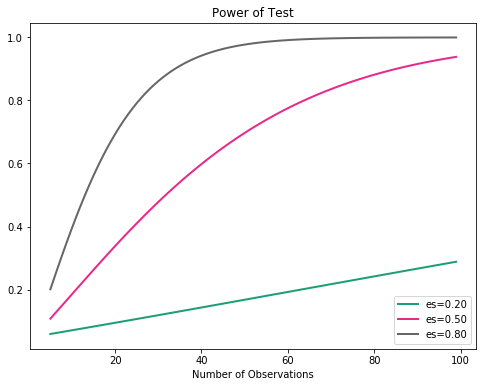

In [52]:
sample_sizes = np.array(range(5, 100))
effect_sizes = np.array([0.2, 0.5, 0.8])

# Create results object for t-test analysis
from statsmodels.stats.power import TTestIndPower
results = TTestIndPower()

# Plot the power analysis
results.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

### Multiple testing

>　　In statistics, the `multiple comparisons`, `multiplicity` or `multiple testing` ***problem occurs when one considers a set of statistical inferences simultaneously or infers a subset of parameters selected based on the observed values***.  
　　The more inferences are made, the more likely erroneous inferences are to occur. Several statistical techniques have been developed to prevent this from happening, allowing significance levels for single and multiple comparisons to be directly compared.    
　　These techniques generally require a stricter significance threshold for individual comparisons, so as to compensate for the number of inferences being made. 
  
Common approaches
+ Bonferroni correction
+ Sidak correction
+ Step-based procedures
+ Tukey’s procedure
+ Dunnet’s correction

In [53]:
%%html
<video controls="" preload="none" width="900px" height="600px">
    <source src="Multiple testing.mp4">
</video>